In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


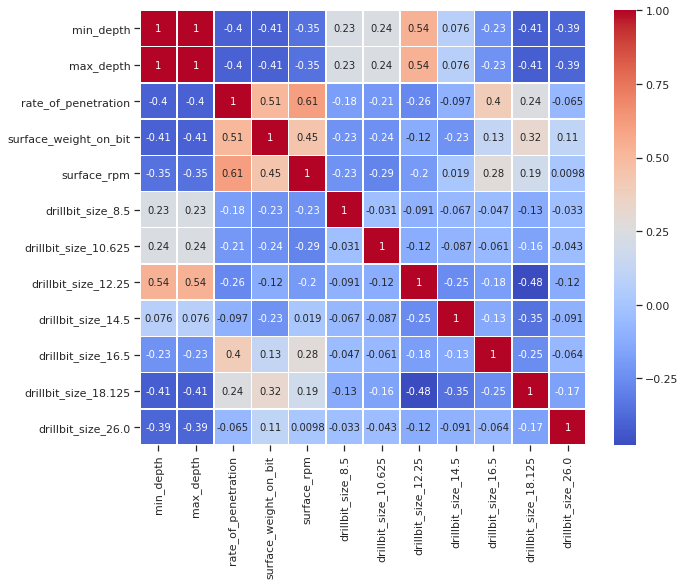

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path_to_csv= "/content/drive/My Drive/Datathon_2020/filesForStartOfDatathon/"
data = pd.read_csv(path_to_csv + "One Hot.csv")
df= pd.concat([data.iloc[:,2:7], data.iloc[:,-7:]], axis = 1)
            
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap = 'coolwarm')

plt.savefig('/content/drive/My Drive/Datathon_2020/figures/heatmap.png', bbox_inches='tight')

In [7]:
df["rate_of_penetration"].describe()

count    6838.000000
mean      106.997573
std        55.061943
min         5.382589
25%        62.480077
50%       100.828372
75%       136.087159
max       512.754999
Name: rate_of_penetration, dtype: float64

In [48]:
data2 = pd.read_csv(path_to_csv + "Clean Data.csv")
# data2.head()
drill_bit_pairwise_df = data2.iloc[:,6:]
drill_bit_pairwise_df.head()

,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [0]:
drill_bit_pairwise_df["drillbit_size"] = drill_bit_pairwise_df["drillbit_size"].astype(str).map(lambda x : x + ' in')

In [50]:
drill_bit_pairwise_df.head()

,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,12.25 in,21834.5,21839.5,99.614650,43.533280,150.369091
1,12.25 in,21840.0,21869.5,99.354021,42.382033,150.369001
2,12.25 in,21870.0,21899.5,83.622907,48.675129,150.429335
3,12.25 in,21900.0,21929.5,85.427731,30.041290,150.080000
4,12.25 in,21930.0,21959.5,100.639811,31.406319,150.032167


In [0]:
drill_bit_pairwise_df = pd.concat([drill_bit_pairwise_df.iloc[:,1:], drill_bit_pairwise_df.iloc[:,0]], axis = 1)

In [52]:
drill_bit_pairwise_df.head()

,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,drillbit_size
0,21834.5,21839.5,99.614650,43.533280,150.369091,12.25 in
1,21840.0,21869.5,99.354021,42.382033,150.369001,12.25 in
2,21870.0,21899.5,83.622907,48.675129,150.429335,12.25 in
3,21900.0,21929.5,85.427731,30.041290,150.080000,12.25 in
4,21930.0,21959.5,100.639811,31.406319,150.032167,12.25 in


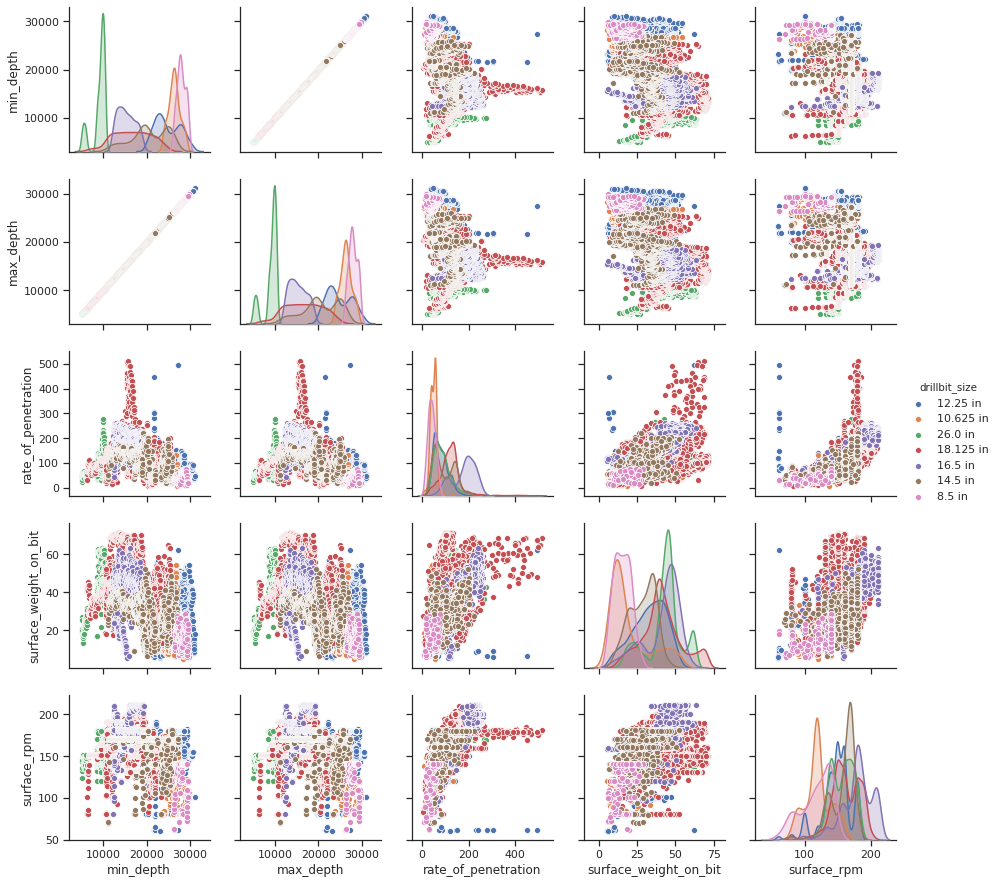

In [53]:
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(drill_bit_pairwise_df, hue="drillbit_size")
plt.savefig('/content/drive/My Drive/Datathon_2020/figures/pairplot.png')